In [1]:
import base64
import pathlib
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

I've a few images to play with

In [2]:
ls *'.jpg'

cat.1.jpg       cat.2.jpg       monkey.jpg      thebeatles.jpg


In [3]:
IP = 'localhost' 
PORT = '8080'
CLASSIFIER = 'classificationbox'
MODEL_ID = "image_classifier_1"

MODEL_CREATION_URL = 'http://{}:{}/{}/models'.format(IP, PORT, CLASSIFIER)
MODEL_TEACH_URL = 'http://{}:{}/{}/models/{}/teach'.format(IP, PORT, CLASSIFIER, MODEL_ID)
MODEL_PREDICT_URL = 'http://{}:{}/{}/models/{}/predict'.format(IP, PORT, CLASSIFIER, MODEL_ID)
MODEL_STATS_URL = 'http://{}:{}/{}/models/{}/stats'.format(IP, PORT, CLASSIFIER, MODEL_ID)

# Working with images

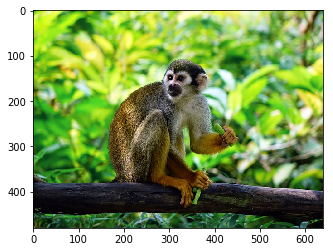

In [4]:
IMG_FILE = "monkey.jpg"
FIG_SIZE = (6, 4)

img = plt.imread(IMG_FILE)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

Base64 encode image data to string

In [5]:
with open(IMG_FILE, "rb") as f:
    image_data = base64.b64encode(f.read()).decode('ascii')

In [6]:
image_data[0:100]

'/9j/4AAQSkZJRgABAQAAAQABAAD/4QDERXhpZgAASUkqAAgAAAADAA8BAgAFAAAAMgAAABABAgAJAAAAOAAAAGmHBAABAAAAQgAA'

lets make a helper function

In [8]:
def base64_encode_image(image_path):
    """
    Takes the path to an image and returns the base64 encoded
    image data as a string.
    """
    with open(image_path, "rb") as f:
        image_data = base64.b64encode(f.read()).decode('ascii')
    return image_data

base64_encode_image("monkey.jpg")[0:100]

'/9j/4AAQSkZJRgABAQAAAQABAAD/4QDERXhpZgAASUkqAAgAAAADAA8BAgAFAAAAMgAAABABAgAJAAAAOAAAAGmHBAABAAAAQgAA'

# Create and teach the model a monkey

In [9]:
model = {"id": MODEL_ID,
         "name": "Cat/monkey classifier",
         "options": {
             "ngrams": 1,
             "skipgrams": 1},
         "classes": [
             "cat_class",
             "monkey_class"]}

In [10]:
requests.post(MODEL_CREATION_URL, json=model).json() # Create the model

{'success': True,
 'id': 'image_classifier_1',
 'name': 'Cat/monkey classifier',
 'options': {'ngrams': 1, 'skipgrams': 1},
 'predict_only': False}

In [11]:
data_to_teach = {
    "class": "monkey_class",
    "inputs": [
        {"key": "photo", "type": "image_base64", "value": image_data}
    ]}

requests.post(MODEL_TEACH_URL, json=data_to_teach).json() # Teach the model the monkey data

{'success': True}

# Teach a cat

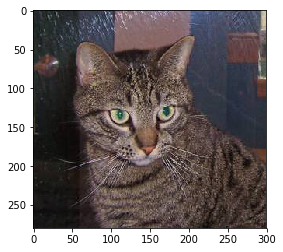

In [12]:
img = plt.imread('cat.1.jpg')
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

In [13]:
cat_data_to_teach = {
    "class": "cat_class",
    "inputs": [
        {"key": "photo", "type": "image_base64", "value": base64_encode_image('cat.1.jpg')}
    ]}
requests.post(MODEL_TEACH_URL, json=cat_data_to_teach).json() # Teach the model the monkey data

{'success': True}

# Predict from a cat image

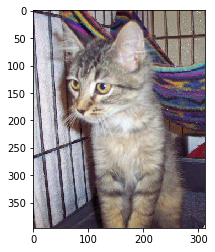

In [14]:
img = plt.imread('cat.2.jpg')
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

In [15]:
predict_data = {
    "inputs": [
        {"key": "photo", "type": "image_base64", "value": base64_encode_image('cat.2.jpg')}]}

requests.post(MODEL_PREDICT_URL, json=predict_data).json()

{'success': True,
 'classes': [{'id': 'monkey_class', 'score': 0.573507},
  {'id': 'cat_class', 'score': 0.426493}]}

OK it predicted a monkey, but perhaps needs alot more data..!